<a href="https://colab.research.google.com/github/aniketmodi-work/ML-NMIMS/blob/master/Lab_Assigments/ML_Lab_Exp_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 4 - Data visualization methods

### **Aim:**

Python for data visualization

### **Objectives:**
Exploring data sets using matplotlib, seaborn
Exploring numpy and pandas libraries of python


In [4]:
#for displaying mutiple outputs from same cell together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### **Exercise 1**: Exploring Canadian immigration data from 1980 to 2013

**Topics:**

* Pie charts
* Box plots
* Scatter plots
* Bubble plots


In [146]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [6]:
can.head()
can.shape
can.info()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


(195, 43)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [147]:
can.drop(['AREA','REG','DEV','Coverage','Type'], axis='columns', inplace=True)

can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Continent-region','DevName':'Development-status'}, inplace=True)


can.set_index('Country', inplace=True)

can['Total_count']= can.sum(axis='columns')

years = range(1980,2014)


In [8]:
can.columns
can.dtypes

Index([         'Continent',   'Continent-region', 'Development-status',
                       1980,                 1981,                 1982,
                       1983,                 1984,                 1985,
                       1986,                 1987,                 1988,
                       1989,                 1990,                 1991,
                       1992,                 1993,                 1994,
                       1995,                 1996,                 1997,
                       1998,                 1999,                 2000,
                       2001,                 2002,                 2003,
                       2004,                 2005,                 2006,
                       2007,                 2008,                 2009,
                       2010,                 2011,                 2012,
                       2013,        'Total_count'],
      dtype='object')

Continent             object
Continent-region      object
Development-status    object
1980                   int64
1981                   int64
1982                   int64
1983                   int64
1984                   int64
1985                   int64
1986                   int64
1987                   int64
1988                   int64
1989                   int64
1990                   int64
1991                   int64
1992                   int64
1993                   int64
1994                   int64
1995                   int64
1996                   int64
1997                   int64
1998                   int64
1999                   int64
2000                   int64
2001                   int64
2002                   int64
2003                   int64
2004                   int64
2005                   int64
2006                   int64
2007                   int64
2008                   int64
2009                   int64
2010                   int64
2011          

In [9]:
#Lets start

import matplotlib.pyplot as plt
import matplotlib as mpl

In [10]:
continents = can.groupby('Continent', axis='index').sum()
continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_count
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


([<matplotlib.patches.Wedge at 0x7f2aa339e5c0>,
 [Text(1.0497616170325197, 0.3286343673526397, ''),
  Text(-0.6764073181528835, 0.8674520966308308, ''),
  Text(-0.1767844995824363, -1.0857012667890682, ''),
  Text(0.8652371475215046, -0.6792383076276324, ''),
  Text(1.083714073521409, -0.1885836865999661, ''),
  Text(1.0995977432976392, -0.029745637238752513, '')])

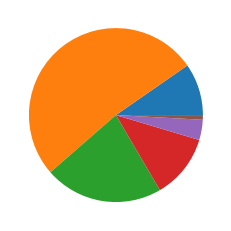

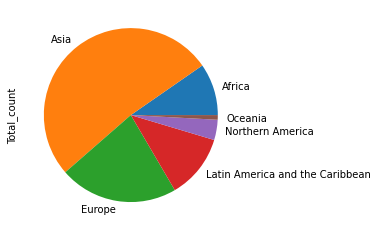

In [11]:
#baseline pie chart
plt.pie(continents['Total_count'])
plt.show()
continents['Total_count'].plot(kind='pie')

**Q1. By Continent-region pie-chart use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows.**

In [12]:
colorlist = ['b','y','g','r','m','c']
explodelist=[1,0.2,0,0,0.1,0.1]

(-1.285674435541, 2.108614608390066, -1.133977159690612, 1.276359007595445)

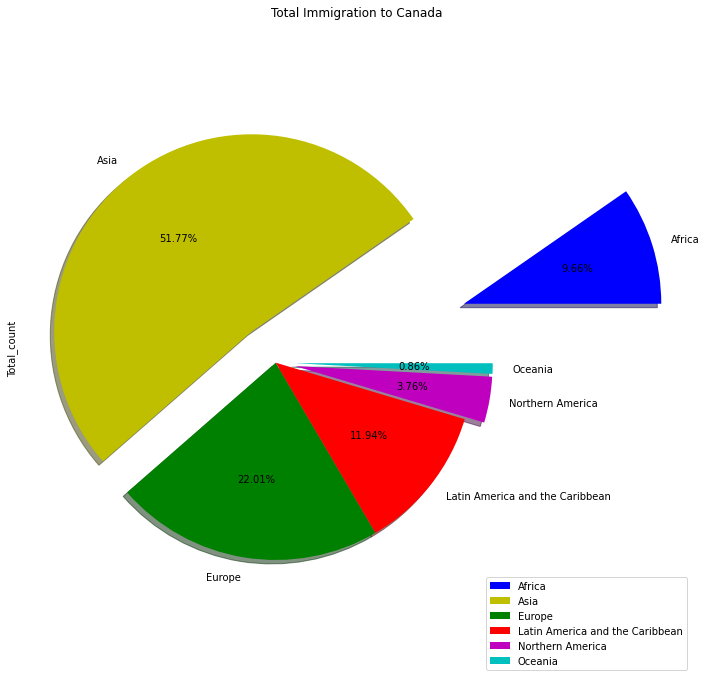

In [71]:
continents['Total_count'].plot(kind = 'pie',
                               figsize = (12,12),
                               autopct = '%1.2f%%',
                               colors = colorlist,
                               explode = explodelist,
                               title = 'Total Immigration to Canada',
                               shadow=True
                               )
plt.legend(labels = continents.index, loc = 'lower right')
plt.axis('equal')

In [34]:
import inspect
from inspect import signature as sig

In [ ]:
help(continents['Total_count'].plot())

**Q2. By Development-status pie-chart use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows.**

In [81]:
dev = can.groupby('Development-status').sum()
dev

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_count
Development-status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Developed regions,51143,56707,53240,32504,29675,28052,32224,55500,62129,68967,75465,65368,72649,72520,70325,62359,63070,55322,42678,42605,45469,50634,43620,42137,47325,46695,45071,45591,47664,46805,44158,36946,39682,39712,1714011
Developing regions,47994,53856,51031,43046,43742,41926,53824,79271,77177,95465,112589,142141,149038,149529,123340,125353,137015,137563,118049,137213,171243,192009,179491,175160,184758,210762,201986,186814,195383,201963,232798,209248,216540,217825,4695142


In [93]:
mpl.colors.TABLEAU_COLORS

OrderedDict([('tab:blue', '#1f77b4'),
             ('tab:orange', '#ff7f0e'),
             ('tab:green', '#2ca02c'),
             ('tab:red', '#d62728'),
             ('tab:purple', '#9467bd'),
             ('tab:brown', '#8c564b'),
             ('tab:pink', '#e377c2'),
             ('tab:gray', '#7f7f7f'),
             ('tab:olive', '#bcbd22'),
             ('tab:cyan', '#17becf')])

In [94]:
colorlist = ['tab:orange', 'tab:cyan']
explodelist = [0,0.1]

(-1.1144539049383098,
 1.1973911174708034,
 -1.1865366624789278,
 1.1041207934513775)

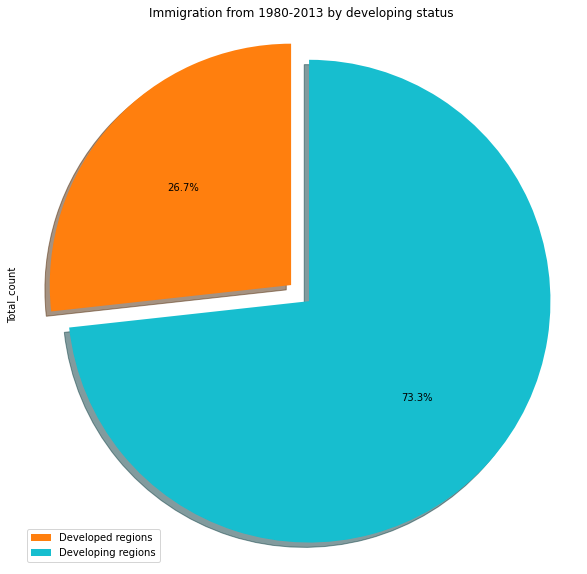

In [96]:
dev['Total_count'].plot(
    title = 'Immigration from 1980-2013 by developing status',
    kind='pie',
    figsize=(10,10),
    startangle=90,
    autopct='%1.1f%%',
    shadow=True,
    labels=None,
    colors=colorlist,
    explode=explodelist
)

plt.axis('equal') #pie chart looks like a circle
plt.legend(labels = dev.index, loc='lower left')
plt.show()

In [101]:
india = can.loc['India',years].transpose()
india.tail()

2009    29456
2010    34235
2011    27509
2012    30933
2013    33087
Name: India, dtype: object

Text(0, 0.5, 'Number of immigrants')

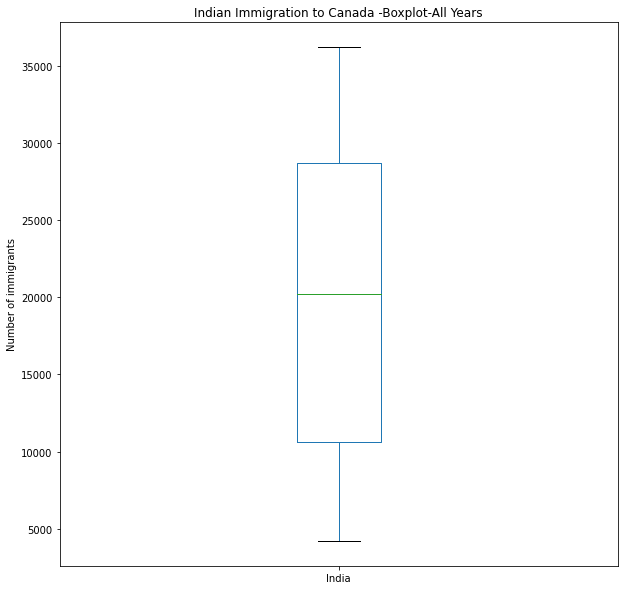

In [103]:
india.plot(
    kind='box',
    figsize=(10,10),
    title = "Indian Immigration to Canada -Boxplot-All Years",
)
plt.ylabel('Number of immigrants')

Text(0.5, 1.0, 'top 5 countries sending immigration to Canada -Boxplot-All Years')

Text(0, 0.5, 'No. of immigrants')

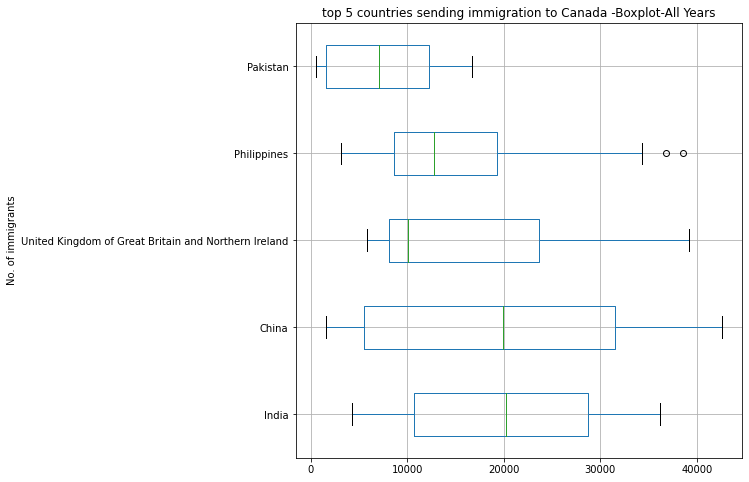

In [130]:
can.sort_values(by = 'Total_count', axis = 'index', ascending = False)[years].head(5).transpose().boxplot(vert = False,
                                                                                                          figsize = (8,8))
plt.title("top 5 countries sending immigration to Canada -Boxplot-All Years")
plt.ylabel('No. of immigrants')

Text(0.5, 1.0, 'top 5 countries sending immigration to Canada -Boxplot-All Years')

Text(0, 0.5, 'No. of immigrants')

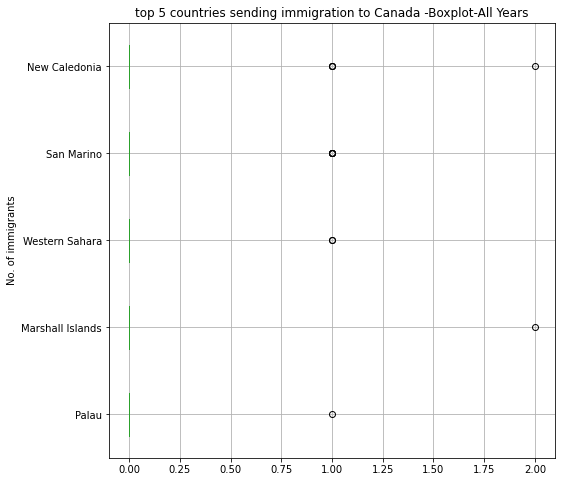

In [133]:
can.sort_values(by = 'Total_count', axis = 'index', ascending = True)[years].head(5).transpose().boxplot(vert = False,
                                                                                                         figsize = (8,8))
plt.title("top 5 countries sending immigration to Canada -Boxplot-All Years")
plt.ylabel('No. of immigrants')

In [137]:
df1 = can
df1.drop(["Continent","Continent-region","Development-status","Total_count"], axis='columns',inplace=True)
df1=df1.transpose()
df1.tail()

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,"China, Hong Kong Special Administrative Region","China, Macao Special Administrative Region",Colombia,...,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,State of Palestine,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,The former Yugoslav Republic of Macedonia,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
2009,1746,716,5393,0,0,62,38,467,267,1018,109,165,27,35,2104,125,454,358,38,238,865,214,156,15,2509,5,784,162,566,1,203,1344,0,19,87,375,29622,657,21,4652,...,70,366,128,27,1214,1188,195,4547,400,422,12,10,167,328,917,50,512,198,400,5,1134,1195,1238,20,0,185,2367,37,8876,136,8995,99,288,1,1353,2171,0,128,60,508
2010,1758,561,4752,0,0,61,27,459,252,933,124,209,25,28,4721,121,438,363,39,290,1464,180,168,42,2598,12,556,186,529,3,200,1800,0,26,98,340,30391,623,21,5218,...,63,805,135,12,1528,1238,174,4422,654,612,13,3,159,285,1039,52,499,188,354,5,915,1299,1492,30,0,216,3159,86,8724,200,8142,93,289,0,998,1942,0,211,102,494
2011,2203,539,4325,0,0,39,37,278,236,851,84,138,40,21,2694,97,357,332,36,284,1879,86,140,53,1508,6,365,144,604,3,196,1638,1,18,79,174,28502,591,13,4366,...,96,219,134,13,1535,959,179,3309,555,531,11,13,134,266,1005,47,396,130,261,2,588,1442,1257,20,1,213,2515,60,6204,215,7676,81,162,0,1452,1723,0,160,69,434
2012,2635,620,3774,0,1,70,51,263,258,982,102,161,60,39,2640,132,277,402,34,391,1075,83,121,64,1642,3,451,269,684,6,233,2507,1,45,97,291,33024,728,33,3741,...,72,146,136,36,1582,1243,262,3338,533,444,16,17,140,243,650,34,296,126,299,3,586,1503,1068,20,0,222,2265,54,6195,224,7891,47,235,0,1373,1731,0,174,46,437
2013,2004,603,4331,0,1,45,25,282,207,1121,90,57,55,32,3789,97,247,379,53,397,487,107,119,76,1714,6,512,322,480,2,288,2439,2,169,86,273,34129,774,29,3631,...,63,141,105,20,2028,1240,331,2394,462,343,4,39,140,201,1009,39,400,112,316,5,427,1627,729,14,0,206,2487,46,5827,182,8501,58,167,0,1022,2112,0,217,59,407


Text(0.5, 1.0, 'Norway - Sweden- Denmark, countries sending immigration to Canada -Boxplot-All Years')

Text(0, 0.5, 'No. of immigrants')

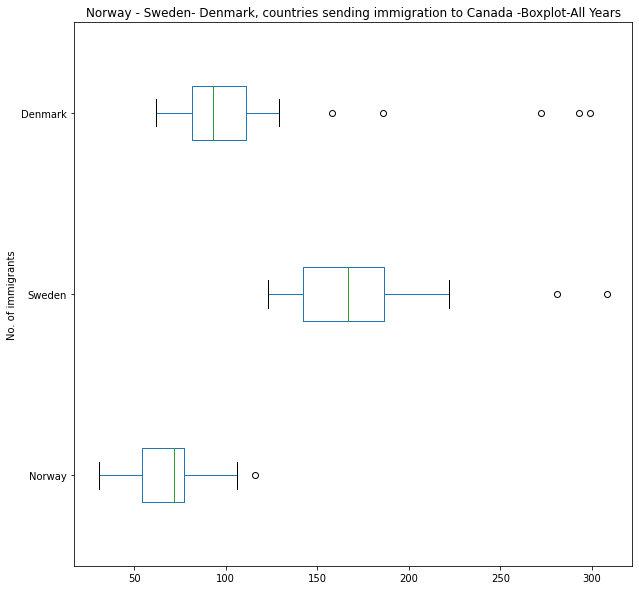

In [138]:
dfnsd=df1[["Norway","Sweden",'Denmark']]
#dfnsd.tail()
dfnsd.plot(kind='box',figsize=(10,10),vert=False)

plt.title("Norway - Sweden- Denmark, countries sending immigration to Canada -Boxplot-All Years")
plt.ylabel('No. of immigrants')
plt.show()

**Q3. Create 4 subplots - to display boxplot of top 5 countries in europe, asia, africa, oceania**

In [167]:
can['Continent'].value_counts()

Africa                             54
Asia                               49
Europe                             43
Latin America and the Caribbean    33
Oceania                            14
Northern America                    2
Name: Continent, dtype: int64

In [163]:
europe = can[can['Continent'] == 'Europe']

eu_p = europe.sort_values(by = 'Total_count', ascending = False).head(5)[years].transpose().tail(5)
eu_p

Country,United Kingdom of Great Britain and Northern Ireland,Poland,France,Romania,Portugal
2009,8876,1013,5051,2076,623
2010,8724,795,4646,1922,629
2011,6204,720,4080,1776,528
2012,6195,779,6280,1588,560
2013,5827,852,5623,1512,630


In [165]:
africa = can[can['Continent'] == 'Africa']

af_p = africa.sort_values(by = 'Total_count', ascending = False).head(5)[years].transpose().tail(5)
af_p

Country,Egypt,Morocco,Algeria,Somalia,South Africa
2009,3496,5532,5393,1214,1188
2010,5982,6242,4752,1528,1238
2011,4663,4399,4325,1535,959
2012,5555,3878,3774,1582,1243
2013,4165,3261,4331,2028,1240


In [168]:
carra = can[can['Continent'] == 'Latin America and the Caribbean']

car = carra.sort_values(by = 'Total_count', ascending = False).head(5)[years].transpose().tail(5)
car

Country,Jamaica,Haiti,Guyana,Colombia,Mexico
2009,2456,2080,1180,4652,3092
2010,2321,4744,953,5218,3865
2011,2059,6503,804,4366,3947
2012,2182,5868,676,3741,4227
2013,2479,4152,656,3631,3996


In [169]:
Oceania = can[can['Continent'] == 'Oceania']

oc_p = Oceania.sort_values(by = 'Total_count', ascending = False).head(5)[years].transpose().tail(5)
oc_p

Country,Australia,Fiji,New Zealand,Tonga,Samoa
2009,1018,311,520,5,2
2010,933,398,490,5,5
2011,851,316,375,2,3
2012,982,270,417,3,2
2013,1121,228,415,5,0


In [170]:
Northern_America = can[can['Continent'] == 'Northern America']

na_p = Northern_America.sort_values(by = 'Total_count', ascending = False).head(5)[years].transpose().tail(5)
na_p

Country,United States of America,Canada
2009,8995,0
2010,8142,0
2011,7676,1
2012,7891,1
2013,8501,2


In [172]:
Asia = can[can['Continent'] == 'Asia']

a_p = Asia.sort_values(by = 'Total_count', ascending = False).head(5)[years].transpose().tail(5)
a_p

Country,India,China,Philippines,Pakistan,Iran (Islamic Republic of)
2009,29456,29622,28573,7217,6580
2010,34235,30391,38617,6811,7477
2011,27509,28502,36765,7468,7479
2012,30933,33024,34315,11227,7534
2013,33087,34129,29544,12603,11291


Text(0.5, 1.0, 'Top 5 Europen countries')

Text(0, 0.5, 'No. of immigrants')

Text(0.5, 1.0, 'Top 5 Asian countries')

Text(0, 0.5, 'No. of immigrants')

Text(0.5, 1.0, 'Top 5 African countries')

Text(0, 0.5, 'No. of immigrants')

Text(0.5, 1.0, 'Top 5 Oceania countries')

Text(0, 0.5, 'No. of immigrants')

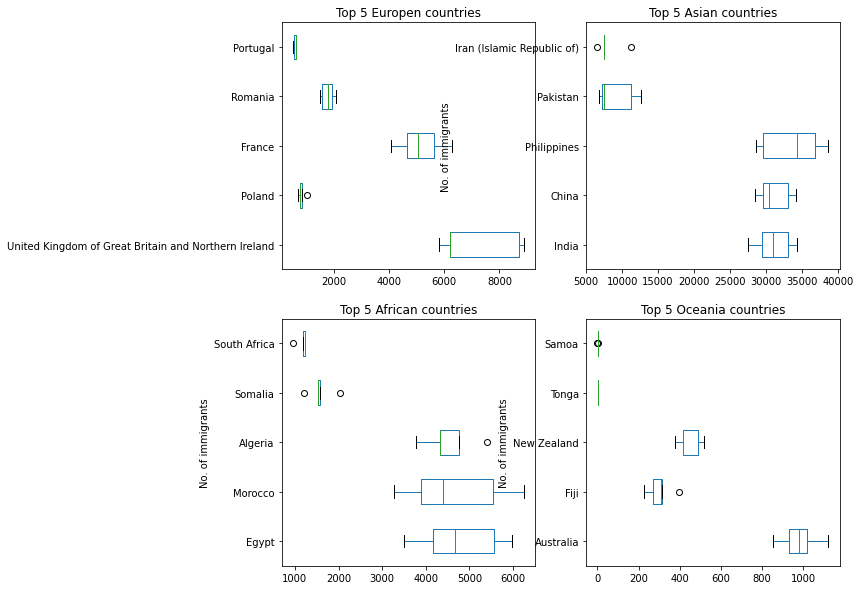

In [174]:
#using subplots

fig=plt.figure()

#Create 2 subplots
ax1=fig.add_subplot(2,2,1)#2 row,2 columsn-1st figure
ax2=fig.add_subplot(2,2,2)#2 row,2 columsn-2nd figure
ax3=fig.add_subplot(2,2,3)#2 row,2 columsn-3rd figure
ax4=fig.add_subplot(2,2,4)#2 row,2 columsn-4th figure

#write whic is ax1 and which is ax2
eu_p.plot(kind='box',figsize=(10,10),vert=False,ax=ax1)
ax1.set_title("Top 5 Europen countries")
ax2.set_ylabel('No. of immigrants')

a_p.plot(kind='box',figsize=(10,10),vert=False,ax=ax2)
ax2.set_title("Top 5 Asian countries")
ax2.set_ylabel('No. of immigrants')

af_p.plot(kind='box',figsize=(10,10),vert=False,ax=ax3)
ax3.set_title("Top 5 African countries")
ax3.set_ylabel('No. of immigrants')

oc_p.plot(kind='box',figsize=(10,10),vert=False,ax=ax4)
ax4.set_title("Top 5 Oceania countries")
ax4.set_ylabel('No. of immigrants')



plt.show()

**Q4. Identify countries which are outliers based on total migration**

In [176]:
df_can = can

In [178]:
#Find Outliers in data
# larger than Q3 (75%) by 1.5IQR
# smaller than Q1 (25%) by 1.5IQR
#From above Image
Q1 = 952
Q3 = 22239.5
IQR = Q3 - Q1

Outlier1 = Q1 - (1.5)*(IQR)
Outlier2 = Q3 + (1.5)*(IQR)

Outliers=df_can[(df_can['Total_count']< Outlier1 ) | (df_can['Total_count']> Outlier2 )]
Outliers.reset_index(inplace=True)
Outliers

,Country,Continent,Continent-region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_count
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
2,Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,503,476,387,611,1115,1655,1280,1361,2042,2824,3378,2202,2064,3119,3831,2944,2137,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
3,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
4,Colombia,Latin America and the Caribbean,South America,Developing regions,266,326,360,244,235,214,257,376,352,439,614,652,582,464,375,371,381,578,929,1306,2259,2965,3283,4318,4566,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
5,Egypt,Africa,Northern Africa,Developing regions,612,660,755,455,447,348,514,1017,1085,1663,2365,1860,1558,1598,2375,2821,2561,2137,1387,1378,1642,2595,2039,2230,2393,2496,2190,2356,3347,3496,5982,4663,5555,4165,72745
6,El Salvador,Latin America and the Caribbean,Central America,Developing regions,110,295,882,2587,2666,2769,3106,3558,2720,2955,4384,7124,5670,2977,1217,722,736,603,477,424,569,453,473,446,442,436,430,929,1115,845,787,691,641,639,54878
7,France,Europe,Western Europe,Developed regions,1729,2027,2219,1490,1169,1177,1298,1658,2038,2332,2177,2911,3487,3709,2759,3332,2623,2473,3214,3343,3765,3806,3463,3568,4391,4429,4002,4290,4532,5051,4646,4080,6280,5623,109091
8,Germany,Europe,Western Europe,Developed regions,1626,1977,3062,2376,1610,1441,1233,1704,1482,1706,1273,1273,1181,1488,1255,1553,1686,1397,1363,1717,1703,1456,1375,1865,2020,2226,2767,2449,3833,3887,2956,2053,1702,1217,63912
9,Guyana,Latin America and the Caribbean,South America,Developing regions,2334,2943,3575,2650,1932,2299,3942,6174,2977,3270,2824,3266,2932,3399,4181,3935,2324,1795,1238,1366,1308,1707,1479,1410,1341,1215,1286,1277,1137,1180,953,804,676,656,75785


**Q5. Identify countries which are outliers basedon year 2013**

In [179]:
#Find Outliers in data
# larger than Q3 (75%) by 1.5IQR
# smaller than Q1 (25%) by 1.5IQR
#From above Image
Q1 = 45
Q3 = 796
IQR = Q3 - Q1

Outlier1 = Q1 - (1.5)*(IQR)
Outlier2 = Q3 + (1.5)*(IQR)

Outliers=df_can[(df_can[2013]< Outlier1 ) | (df_can[2013]> Outlier2 )]
Outliers.reset_index(inplace=True)
Outliers.shape

(29, 39)

In [180]:

dfscat=df_can[years].sum(axis='index')
type(dfscat)#new to convert to add frame
dfscat=pd.DataFrame(dfscat)
type(dfscat)

dfscat.reset_index(inplace=True)#to convert to 2 columns as first we had 1 column only
dfscat.columns=['Year','Total']
dfscat

pandas.core.series.Series

pandas.core.frame.DataFrame

,Year,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417
5,1985,69978
6,1986,86048
7,1987,134771
8,1988,139306
9,1989,164432


In [181]:
x=dfscat['Year']
y=dfscat['Total']
fit=np.polyfit(x,y,1)#Linear regression
fit#0 is slope & 1 is intercept

array([ 5.56709228e+03, -1.09261952e+07])

Text(0.5, 1.0, 'Total immigration 1980-2013')

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Number of immigrants')

Text(2000, 150000, 'y=5567 x  -10926195')

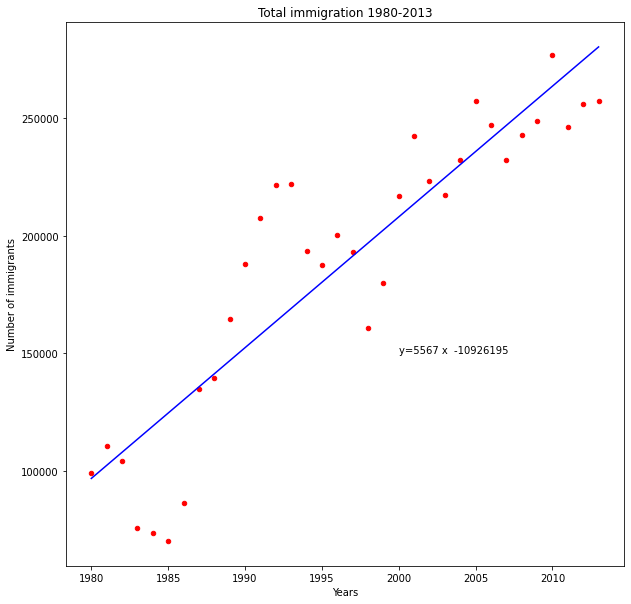

In [182]:
dfscat.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Total',
    color='red'
)
plt.title("Total immigration 1980-2013")
plt.xlabel("Years")
plt.ylabel("Number of immigrants")


plt.plot(x,fit[0]*x+fit[1], color='blue')

plt.annotate('y={0:.0f} x  {1: .0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

In [183]:
#Bubble plots

dfnew = df_can[years].transpose()
dfnew.reset_index(inplace=True)
dfnew.head()
dfnew.rename(columns={'index':'Year'}, inplace=True)
dfnew['Total'] = dfnew.sum(axis='columns')
dfnew=dfnew[['Year',"India","China"]]
dfnew.tail()

Country,index,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,"China, Hong Kong Special Administrative Region","China, Macao Special Administrative Region",...,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,State of Palestine,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,The former Yugoslav Republic of Macedonia,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,702,234,0,26,0,83,372,0,511,16,2,0,44,0,10,211,79,24,2,0,1,12,9,0,4,0,1233,5123,0,0,...,6,241,0,0,7,1026,211,185,0,20,15,4,281,806,315,0,56,0,5,2,958,58,481,0,0,13,0,0,22045,635,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,639,238,0,23,2,84,376,0,540,27,5,0,52,0,1,220,6,20,1,0,1,19,2,0,3,0,1069,6682,0,0,...,6,301,0,0,10,1118,299,371,0,12,10,1,308,811,419,0,53,0,5,4,947,51,874,0,1,16,0,2,24796,832,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,484,201,0,38,1,86,299,0,519,13,4,0,42,0,3,192,8,12,3,0,2,26,16,0,1,1,1078,3308,0,0,...,7,337,0,0,7,781,260,290,0,11,21,1,222,634,409,0,113,0,2,7,972,55,706,0,0,17,0,2,20620,621,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,317,117,0,12,1,81,244,0,297,21,3,0,49,0,3,139,2,33,2,0,0,33,7,0,0,0,781,1863,0,0,...,3,169,0,0,12,379,133,197,0,7,12,0,176,370,269,0,65,0,3,1,766,46,280,0,0,38,0,1,10015,474,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,317,127,0,21,1,98,265,0,183,37,4,1,38,0,7,145,2,11,3,1,11,10,8,0,0,0,681,1527,0,0,...,12,128,0,0,14,271,137,1086,0,23,5,10,128,326,264,0,82,0,6,2,606,51,338,0,1,32,0,2,10170,473,6661,90,0,0,142,7583,0,0,16,32


Country,Year,India,China
29,2009,29456,29622
30,2010,34235,30391
31,2011,27509,28502
32,2012,30933,33024
33,2013,33087,34129


Text(0.5, 1.0, 'Immigration to canada from India & China')

Text(0, 0.5, 'No. of Immigrants')

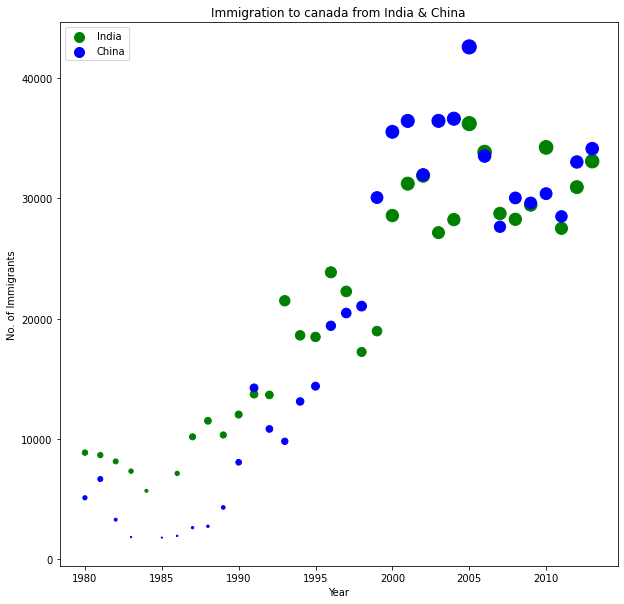

In [184]:
#normalize
#x'=(X-Xmin)/(Xmax-Xmin)

norm_india = (dfnew['India'] - dfnew['India'].min()) / (dfnew['India'].max() - dfnew['India'].min())

norm_china = (dfnew['China'] - dfnew['China'].min()) / (dfnew['China'].max() - dfnew['China'].min())

ax1=dfnew.plot(
    kind="scatter",
    x="Year",
    y="India",
    figsize=(10,10),
    color='green',
    s=norm_india*200
)

ax2=dfnew.plot(
    kind="scatter",
    x="Year",
    y="China",
    figsize=(10,10),
    color='blue',
    ax=ax1,
    s=norm_china*200
)

ax1.set_title("Immigration to canada from India & China")
ax1.set_ylabel("No. of Immigrants")
ax1.legend(['India','China'], loc='upper left')

###**Exercise 2:**

**Q6. Plot the bubble plot for Norway, Denmark, Finland**

In [185]:
dfnew = df_can[years].transpose()
dfnew.reset_index(inplace=True)
dfnew.head()
dfnew.rename(columns={'index':'Year'}, inplace=True)
dfnew['Total'] = dfnew.sum(axis='columns')
dfnew=dfnew[['Year',"Denmark","Finland","Norway"]]
dfnew.tail()

Country,index,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,"China, Hong Kong Special Administrative Region","China, Macao Special Administrative Region",...,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,State of Palestine,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,The former Yugoslav Republic of Macedonia,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,702,234,0,26,0,83,372,0,511,16,2,0,44,0,10,211,79,24,2,0,1,12,9,0,4,0,1233,5123,0,0,...,6,241,0,0,7,1026,211,185,0,20,15,4,281,806,315,0,56,0,5,2,958,58,481,0,0,13,0,0,22045,635,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,639,238,0,23,2,84,376,0,540,27,5,0,52,0,1,220,6,20,1,0,1,19,2,0,3,0,1069,6682,0,0,...,6,301,0,0,10,1118,299,371,0,12,10,1,308,811,419,0,53,0,5,4,947,51,874,0,1,16,0,2,24796,832,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,484,201,0,38,1,86,299,0,519,13,4,0,42,0,3,192,8,12,3,0,2,26,16,0,1,1,1078,3308,0,0,...,7,337,0,0,7,781,260,290,0,11,21,1,222,634,409,0,113,0,2,7,972,55,706,0,0,17,0,2,20620,621,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,317,117,0,12,1,81,244,0,297,21,3,0,49,0,3,139,2,33,2,0,0,33,7,0,0,0,781,1863,0,0,...,3,169,0,0,12,379,133,197,0,7,12,0,176,370,269,0,65,0,3,1,766,46,280,0,0,38,0,1,10015,474,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,317,127,0,21,1,98,265,0,183,37,4,1,38,0,7,145,2,11,3,1,11,10,8,0,0,0,681,1527,0,0,...,12,128,0,0,14,271,137,1086,0,23,5,10,128,326,264,0,82,0,6,2,606,51,338,0,1,32,0,2,10170,473,6661,90,0,0,142,7583,0,0,16,32


Country,Year,Denmark,Finland,Norway
29,2009,81,63,75
30,2010,92,63,46
31,2011,93,72,49
32,2012,94,62,53
33,2013,81,76,59


Text(0.5, 1.0, 'Immigration to canada from Norway , Denmark & Finland')

Text(0, 0.5, 'No. of Immigrants')

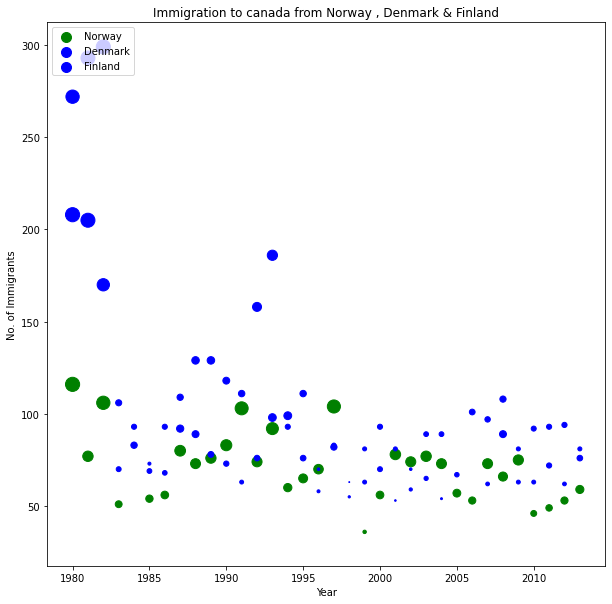

In [186]:
#normalize
#x'=(X-Xmin)/(Xmax-Xmin)

norm_Norway = (dfnew['Norway'] - dfnew['Norway'].min()) / (dfnew['Norway'].max() - dfnew['Norway'].min())
norm_Denamrk = (dfnew['Denmark'] - dfnew['Denmark'].min()) / (dfnew['Denmark'].max() - dfnew['Denmark'].min())
norm_Finland = (dfnew['Finland'] - dfnew['Finland'].min()) / (dfnew['Finland'].max() - dfnew['Finland'].min())

ax1=dfnew.plot(
    kind="scatter",
    x="Year",
    y="Norway",
    figsize=(10,10),
    color='green',
    s=norm_Norway*200
)

ax2=dfnew.plot(
    kind="scatter",
    x="Year",
    y="Denmark",
    figsize=(10,10),
    color='blue',
    ax=ax1,
    s=norm_Denamrk*200
)

ax3=dfnew.plot(
    kind="scatter",
    x="Year",
    y="Finland",
    figsize=(10,10),
    color='blue',
    ax=ax1,
    s=norm_Finland*200
)

ax1.set_title("Immigration to canada from Norway , Denmark & Finland")
ax1.set_ylabel("No. of Immigrants")
ax1.legend(['Norway','Denmark',"Finland"], loc='upper left')

**Q7. Waffle Chart**

In [187]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [190]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [191]:
dfindopakchina = df_can.loc[['India', 'Pakistan', 'China'], :]

dfindopakchina

,Continent,Continent-region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_count
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [193]:

df_dsn = df_can.loc[['India', 'Pakistan', 'China'], :]

categories = df_dsn.index.values # categories

value = dfindopakchina['Total_count']# correponding values of categories

#create a waffle chart

width=40
height=10

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
India: 174
Pakistan: 61
China: 166


<Figure size 432x288 with 0 Axes>

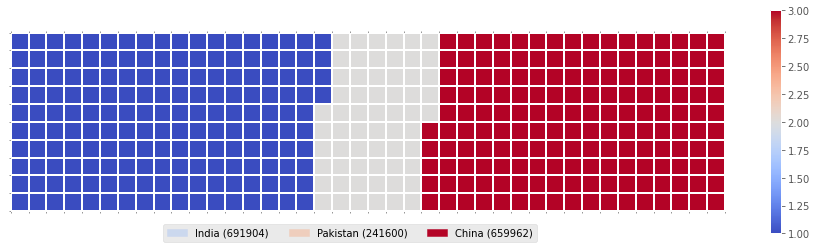

In [194]:

create_waffle_chart(categories, value, height, width, colormap)

In [195]:
# let's create a new dataframe for these three countries 
df_dsn = df_can.loc[['Norway', 'Denmark', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

,Continent,Continent-region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_count
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,80,73,76,83,103,74,92,60,65,70,104,31,36,56,78,74,77,73,57,53,73,66,75,46,49,53,59,2327
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,109,129,129,118,111,158,186,93,111,70,83,63,81,93,81,70,89,89,62,101,97,108,81,92,93,94,81,3901
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,198,171,182,130,167,179,203,192,176,161,151,123,170,138,184,149,161,129,205,139,193,165,167,159,134,140,140,5866


In [198]:

width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total_count'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class
print(values)

Country
Norway     2327
Denmark    3901
Sweden     5866
Name: Total_count, dtype: int64


Total number of tiles is 400
Norway: 77
Denmark: 129
Sweden: 194


<Figure size 432x288 with 0 Axes>

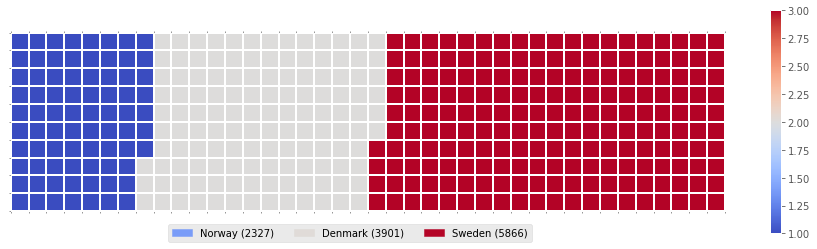

In [199]:
create_waffle_chart(categories, values, height, width, colormap)

or we can do this a simple way

In [204]:
pip install pywaffle

     |████████████████████████████████| 532kB 2.7MB/s 


In [205]:
import pandas as pd 
import matplotlib.pyplot as plt 
from pywaffle import Waffle

In [207]:
df_dsn

,Continent,Continent-region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_count
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,80,73,76,83,103,74,92,60,65,70,104,31,36,56,78,74,77,73,57,53,73,66,75,46,49,53,59,2327
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,109,129,129,118,111,158,186,93,111,70,83,63,81,93,81,70,89,89,62,101,97,108,81,92,93,94,81,3901
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,198,171,182,130,167,179,203,192,176,161,151,123,170,138,184,149,161,129,205,139,193,165,167,159,134,140,140,5866


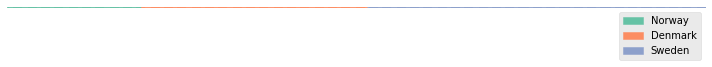

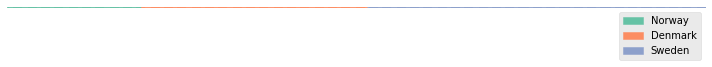

In [218]:
plt.figure( 
    FigureClass = Waffle, 
    rows = 5, 
    values = [2327, 3901, 5866],
    labels = list(df_dsn.index),
    figsize = (10,10)
)

**Q8. Word clouds**

In [200]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

# download file and save as alice_novel.txt
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

/bin/bash: conda: command not found
Wordcloud is installed and imported!
File downloaded and saved!


(-0.5, 399.5, 199.5, -0.5)

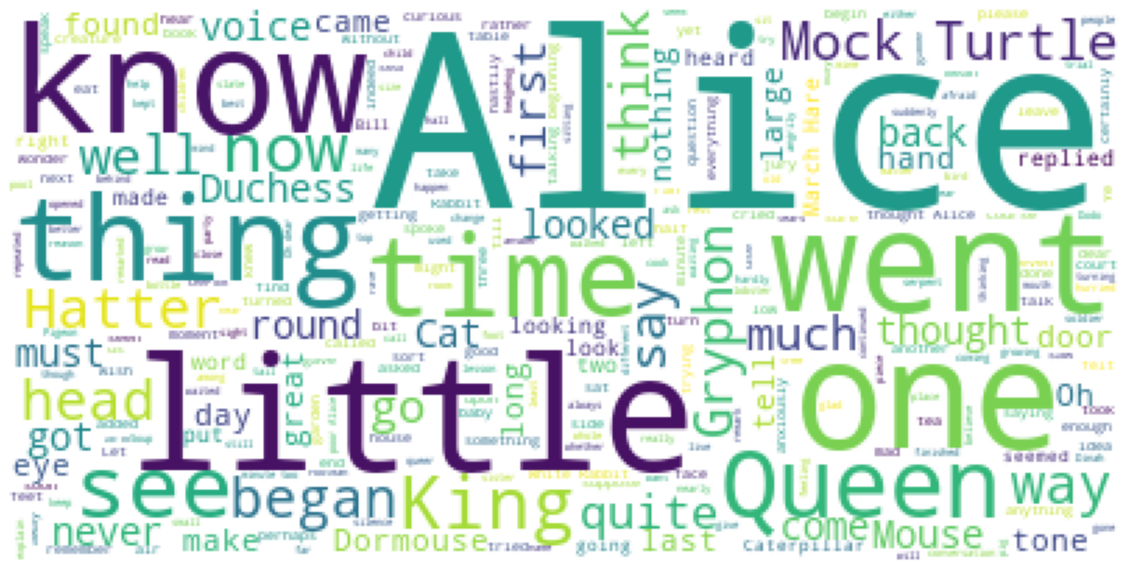

In [219]:
#step1 - preprocessing

stopwordsrem = set(STOPWORDS)
stopwordsrem.add('said')#As 'said' was first there twice also


#step 2-wordcloud object

alicewc = WordCloud(
    background_color = 'white',
    max_words = 2000,#How many maximum words you want
    stopwords = stopwordsrem
)


#step3 - use the object to call function
alicewc.generate(alice_novel)

# step 4 - display
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
plt.imshow(alicewc)
plt.axis('off')#as here there is no axis
plt.show()